In [1]:
import numpy as np 
import pandas as pd 
import re
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/bhanu/Downloads/Semseter 4/Capstone 2/code/US_Accidents_March23_sampled_500k.csv')
print("The shape of data is:",(df.shape))
display(df.head(3))

The shape of data is: (500000, 46)


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,38.990037,-77.398282,0.056,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,34.661189,-120.492442,0.022,...,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                279623 non-null  float64
 8   End_Lng                279623 non-null  float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            499999 non-null  object 
 11  Street                 499309 non-null  object 
 12  City                   499981 non-null  object 
 13  County                 500000 non-null  object 
 14  State                  500000 non-nu

In [4]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
def sniff(df):
        info = pd.DataFrame()
        info['percent missing'] = df.isnull().sum()*100/len(df)
        return info.sort_values('percent missing')

sniff(df)

,percent missing
ID,0.0000
Amenity,0.0000
Give_Way,0.0000
Junction,0.0000
No_Exit,0.0000
Railway,0.0000
Roundabout,0.0000
Station,0.0000
Stop,0.0000
Traffic_Calming,0.0000


### Feature Selection (Manual)

In [7]:
df_cleaned = df[['Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 'Distance(mi)',  'City', 'County', 'State', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']]
sniff(df_cleaned)

,percent missing
Severity,0.0000
Crossing,0.0000
Bump,0.0000
Amenity,0.0000
No_Exit,0.0000
Railway,0.0000
Roundabout,0.0000
Station,0.0000
Stop,0.0000
Traffic_Calming,0.0000


In [8]:
df_cleaned.describe()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,500000.000000,500000.000000,500000.000000,500000.000000,489534.000000,370983.000000,488870.000000,491072.000000,488709.000000,463013.000000,357384.000000
mean,2.212748,36.206421,-94.736583,0.564317,61.646254,58.229028,64.834921,29.536621,9.091540,7.681347,0.008289
std,0.486661,5.071411,17.405761,1.774872,19.000133,22.352246,22.826158,1.008666,2.708083,5.431361,0.101865
min,1.000000,24.562117,-124.497420,0.000000,-77.800000,-53.200000,1.000000,0.120000,0.000000,0.000000,0.000000
25%,2.000000,33.416823,-117.233047,0.000000,49.000000,43.000000,48.000000,29.370000,10.000000,4.600000,0.000000
50%,2.000000,35.832147,-87.794365,0.029000,64.000000,62.000000,67.000000,29.860000,10.000000,7.000000,0.000000
75%,2.000000,40.082443,-80.359601,0.465000,76.000000,75.000000,84.000000,30.030000,10.000000,10.400000,0.000000
max,4.000000,48.999569,-67.484130,193.479996,207.000000,207.000000,100.000000,38.440000,130.000000,822.800000,10.130000


### Handling Missing Values (Numerical)

In [10]:
df_cleaned['Temperature(F)'].fillna(df_cleaned['Temperature(F)'].median(), inplace=True)
df_cleaned['Humidity(%)'].fillna(method='ffill', inplace=True)
df_cleaned['Pressure(in)'].fillna(df_cleaned['Pressure(in)'].median(), inplace=True)
df_cleaned['Weather_Timestamp'].fillna(method='ffill', inplace=True)
df_cleaned['Wind_Chill(F)'].fillna(df_cleaned.groupby('City')['Wind_Chill(F)'].transform('median'), inplace=True)
df_cleaned['Wind_Speed(mph)'].fillna(df_cleaned.groupby('City')['Wind_Speed(mph)'].transform('median'), inplace=True)
df_cleaned['Precipitation(in)'].fillna(df_cleaned.groupby('City')['Precipitation(in)'].transform('median'), inplace=True)

C:\Users\bhanu\AppData\Local\Temp\ipykernel_45292\3799055239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Temperature(F)'].fillna(df_cleaned['Temperature(F)'].median(), inplace=True)
C:\Users\bhanu\AppData\Local\Temp\ipykernel_45292\3799055239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Humidity(%)'].fillna(method='ffill', inplace=True)
C:\Users\bhanu\AppData\Local\Temp\ipykernel_45292\3799055239.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

### Handling Missing Values (Categorical)

In [12]:
df_cleaned['City'].fillna('Unknown', inplace=True)
df_cleaned['Weather_Condition'].fillna(df_cleaned['Weather_Condition'].mode()[0], inplace=True)
df_cleaned['Visibility(mi)'].fillna(df_cleaned['Visibility(mi)'].median(), inplace=True)
df_cleaned['Wind_Direction'].fillna(df_cleaned['Wind_Direction'].mode()[0], inplace=True)

C:\Users\bhanu\AppData\Local\Temp\ipykernel_45292\2899825863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['City'].fillna('Unknown', inplace=True)
C:\Users\bhanu\AppData\Local\Temp\ipykernel_45292\2899825863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Weather_Condition'].fillna(df_cleaned['Weather_Condition'].mode()[0], inplace=True)
C:\Users\bhanu\AppData\Local\Temp\ipykernel_45292\2899825863.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [13]:
df_cleaned = df_cleaned.dropna(subset=['Wind_Chill(F)','Wind_Speed(mph)','Precipitation(in)','Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'])
df_cleaned

,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),City,County,State,Weather_Timestamp,Temperature(F),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,2,2019-06-12 10:10:56,30.641211,-91.153481,0.000,Zachary,East Baton Rouge,LA,2019-06-12 09:53:00,77.0,...,False,False,False,False,True,False,Day,Day,Day,Day
1,2,2022-12-03 23:37:14.000000000,38.990562,-77.399070,0.056,Sterling,Loudoun,VA,2022-12-03 23:52:00,45.0,...,False,False,False,False,False,False,Night,Night,Night,Night
2,2,2022-08-20 13:13:00.000000000,34.661189,-120.492822,0.022,Lompoc,Santa Barbara,CA,2022-08-20 12:56:00,68.0,...,False,False,False,False,True,False,Day,Day,Day,Day
3,2,2022-02-21 17:43:04,43.680592,-92.993317,1.054,Austin,Mower,MN,2022-02-21 17:35:00,27.0,...,False,False,False,False,False,False,Day,Day,Day,Day
4,2,2020-12-04 01:46:00,35.395484,-118.985176,0.046,Bakersfield,Kern,CA,2020-12-04 01:54:00,42.0,...,False,False,False,False,False,False,Night,Night,Night,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,2,2021-12-15 07:30:00,45.522510,-123.084104,0.158,Forest Grove,Washington,OR,2021-12-15 07:14:00,40.0,...,False,False,False,False,False,False,Night,Day,Day,Day
499996,2,2021-12-19 16:25:00,26.702570,-80.111169,0.040,West Palm Beach,Palm Beach,FL,2021-12-19 16:53:00,78.0,...,False,False,False,False,False,False,Day,Day,Day,Day
499997,2,2022-04-13 19:28:29,34.561862,-112.259620,0.549,Dewey,Yavapai,AZ,2022-04-13 19:53:00,52.0,...,False,False,False,False,True,False,Night,Night,Day,Day
499998,3,2020-05-15 17:20:56,38.406680,-78.619310,0.000,Elkton,Rockingham,VA,2020-05-15 17:15:00,82.0,...,False,False,False,False,True,False,Day,Day,Day,Day


In [14]:
missing_values_summary = sniff(df_cleaned)
missing_values_summary

,percent missing
Severity,0.0
Bump,0.0
Crossing,0.0
Give_Way,0.0
Junction,0.0
No_Exit,0.0
Railway,0.0
Amenity,0.0
Roundabout,0.0
Stop,0.0


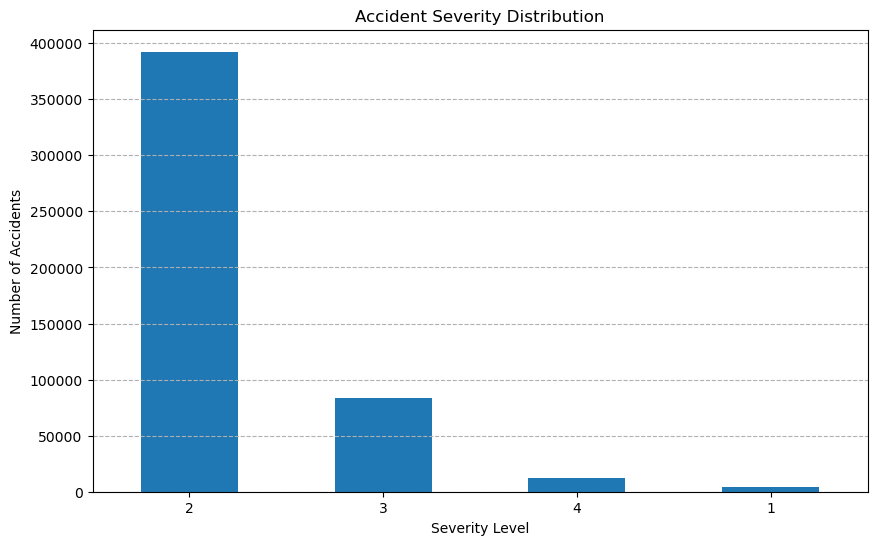

In [15]:
# Calculate the count of accidents by severity
severity_counts = df_cleaned['Severity'].value_counts()

# Plotting the severity counts as a bar chart
plt.figure(figsize=(10, 6))
severity_counts.plot(kind='bar')
plt.title('Accident Severity Distribution')
plt.xlabel('Severity Level')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

# Show the plot
plt.show()

In [16]:
# Merging severity levels: 1 and 2 into 0, 3 into 1, and 4 into 2
severity_mapping = {1: 0, 2: 0, 3: 1, 4: 2}
df_cleaned['Severity_Merged'] = df_cleaned['Severity'].map(severity_mapping)

# Separate the dataset into the three classes based on the new severity mapping
df_minor = df_cleaned[df_cleaned['Severity_Merged'] == 0]
df_major = df_cleaned[df_cleaned['Severity_Merged'] == 1]
df_severe = df_cleaned[df_cleaned['Severity_Merged'] == 2]

# Calculate the minimum number of samples among all severity classes
min_samples = min(len(df_minor), len(df_major), len(df_severe))

# Undersample each severity class to the minimum number of samples
df_minor_undersampled = resample(df_minor,
                               replace=False,
                               n_samples=min_samples,
                               random_state=123)
df_major_undersampled = resample(df_major,
                               replace=False,
                               n_samples=min_samples,
                               random_state=123)
df_severe_undersampled = resample(df_severe,
                                replace=False,
                                n_samples=min_samples,
                                random_state=123)

# Combine the undersampled majority classes with the minority class
df_undersampled = pd.concat([df_minor_undersampled, df_major_undersampled, df_severe_undersampled])

# Verifying the balance in the new DataFrame
final_severity_counts = df_undersampled['Severity_Merged'].value_counts()
final_severity_counts


NameError: name 'resample' is not defined

In [ ]:
# Fix datetime type
df_cleaned['Start_Time'] = pd.to_datetime(df_cleaned['Start_Time'], errors='coerce')
df_cleaned['Weather_Timestamp'] = pd.to_datetime(df_cleaned['Weather_Timestamp'], errors='coerce')

In [ ]:
# df = df.drop(['ID','Description','Distance(mi)', 'End_Time',
#               'End_Lat', 'End_Lng'], axis=1)

Check out some categorical features.

In [ ]:
# cat_names = ['Country', 'Timezone', 'Amenity', 'Bump', 'Crossing',
#              'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
#              'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
#              'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
# print("Unique count of categorical features:")
# for i in cat_names:
#   print(i,df[i].unique().size)

In [ ]:
# #Drop 'Country' and 'Turning_Loop' for they have only one class.
# df = df.drop(['Country','Turning_Loop'], axis=1)

In [ ]:
df_cleaned.head().T

##  Clean Up Categorical Features
If we look at categorical features closely, we will find some chaos in 'Wind_Direction' and 'Weather_Condition'. It is necessary to clean them up first.

### Wind Direction

In [ ]:
print("Wind Direction: ", df_cleaned['Wind_Direction'].unique())

In [ ]:
# from IPython.display import Image

# # Display the image
# Image(filename='WhatsApp Image 2024-02-11 at 11.49.32 PM.jpeg')

In [ ]:
# Simplify wind direction

df_cleaned.loc[df_cleaned['Wind_Direction']=='Calm','Wind_Direction'] = 'CALM'
df_cleaned.loc[(df_cleaned['Wind_Direction']=='West')|(df_cleaned['Wind_Direction']=='WSW')|(df_cleaned['Wind_Direction']=='WNW'),'Wind_Direction'] = 'W'
df_cleaned.loc[(df_cleaned['Wind_Direction']=='South')|(df_cleaned['Wind_Direction']=='SSW')|(df_cleaned['Wind_Direction']=='SSE')|(df_cleaned['Wind_Direction']=='SE')|(df_cleaned['Wind_Direction']=='SW'),'Wind_Direction'] = 'S'
df_cleaned.loc[(df_cleaned['Wind_Direction']=='North')|(df_cleaned['Wind_Direction']=='NNW')|(df_cleaned['Wind_Direction']=='NNE')|(df_cleaned['Wind_Direction']=='NE')|(df_cleaned['Wind_Direction']=='NW'),'Wind_Direction'] = 'N'
df_cleaned.loc[(df_cleaned['Wind_Direction']=='East')|(df_cleaned['Wind_Direction']=='ESE')|(df_cleaned['Wind_Direction']=='ENE'),'Wind_Direction'] = 'E'
df_cleaned.loc[df_cleaned['Wind_Direction']=='Variable','Wind_Direction'] = 'VAR'
print("Wind Direction after simplification: ", df_cleaned['Wind_Direction'].unique())

In [ ]:
weather = df_cleaned['Weather_Condition'].unique()
print("Weather Conditions: ", weather)

In [ ]:
# show distinctive weather conditions
weather ='!'.join(df_cleaned['Weather_Condition'].dropna().unique().tolist())
weather = np.unique(np.array(re.split(
    "!|\s/\s|\sand\s|\swith\s|Partly\s|Mostly\s|Blowing\s|Freezing\s", weather))).tolist()
print("Weather Conditions: ", weather)

In [ ]:
# Create features for some common weather conditions and drop 'Weather_Condition' then.
df_cleaned['Clear'] = np.where(df_cleaned['Weather_Condition'].str.contains('Clear', case=False, na = False), True, False)
df_cleaned['Cloud'] = np.where(df_cleaned['Weather_Condition'].str.contains('Cloud|Overcast', case=False, na = False), True, False)
df_cleaned['Rain'] = np.where(df_cleaned['Weather_Condition'].str.contains('Rain|storm|Drizzle', case=False, na = False), True, False)
df_cleaned['Heavy_Rain'] = np.where(df_cleaned['Weather_Condition'].str.contains('Heavy Rain|Rain Shower|Heavy T-Storm|Heavy Thunderstorms', case=False, na = False), True, False)
df_cleaned['Snow'] = np.where(df_cleaned['Weather_Condition'].str.contains('Snow|Sleet|Ice|Drifting Snow', case=False, na = False), True, False)
df_cleaned['Heavy_Snow'] = np.where(df_cleaned['Weather_Condition'].str.contains('Heavy Snow|Heavy Sleet|Heavy Ice Pellets|Snow Showers|Squalls', case=False, na = False), True, False)
df_cleaned['Fog'] = np.where(df_cleaned['Weather_Condition'].str.contains('Fog', case=False, na = False), True, False)

In [ ]:
# # Assign NA to created weather features where 'Weather_Condition' is null.
# weather = ['Clear','Cloud','Rain','Heavy_Rain','Snow','Heavy_Snow','Fog']
# for i in weather:
#     df.loc[df['Weather_Condition'].isnull(),i] = df.loc[df['Weather_Condition'].isnull(),'Weather_Condition']
#     df[i] = df[i].astype('bool')

# df.loc[:,['Weather_Condition'] + weather]

# df = df.drop(['Weather_Condition'], axis=1)

Since the 'Weather_Timestamp' is almost as same as 'Start_Time', we can just keep 'Start_Time'. Then map 'Start_Time' to 'Year', 'Month', 'Weekday', 'Day' (in a year), 'Hour', and 'Minute' (in a day).

In [ ]:
# Define functions to extract year, month, weekday, hour, and minute from a timestamp column
def get_years(df_cleaned, column):
    return df_cleaned[column].dt.year

def get_months(df_cleaned, column):
    return df_cleaned[column].dt.month

def get_weekdays(df_cleaned, column):
    return df_cleaned[column].dt.weekday

def get_hours(df_cleaned, column):
    return df_cleaned[column].dt.hour

def get_minutes(df_cleaned, column):
    return df_cleaned[column].dt.minute

# Create new columns for year and month of 'Start_Time'
df_cleaned['Start_Time_Month'] = get_months(df_cleaned, 'Start_Time')
df_cleaned['Start_Time_Year'] = get_years(df_cleaned, 'Start_Time')
df_cleaned['Start_Time_Weekday'] = get_weekdays(df_cleaned, 'Start_Time')
df_cleaned['Start_Time_Hour'] = get_hours(df_cleaned, 'Start_Time')
df_cleaned['Start_Time_Minute'] = get_minutes(df_cleaned, 'Start_Time')

# Create new columns for year and month of 'Weather_Timestamp'
df_cleaned['Weather_Timestamp_Month'] = get_months(df_cleaned, 'Weather_Timestamp')
df_cleaned['Weather_Timestamp_Year'] = get_years(df_cleaned, 'Weather_Timestamp')
df_cleaned['Weather_Timestamp_Weekday'] = get_weekdays(df_cleaned, 'Weather_Timestamp')
df_cleaned['Weather_Timestamp_Hour'] = get_hours(df_cleaned, 'Weather_Timestamp')
df_cleaned['Weather_Timestamp_Minute'] = get_minutes(df_cleaned, 'Weather_Timestamp')

# Drop the original timestamp columns
df_cleaned = df_cleaned.drop(['Start_Time', 'Weather_Timestamp'], axis=1)

In [ ]:
df_cleaned.head().T

## MAPPING for Weather condition

In [ ]:
# Create features for some common weather conditions and drop 'Weather_Condition' then.
df_cleaned['Clear'] = df_cleaned['Weather_Condition'].str.contains('Clear|Fair|N/A Precipitation', case=False, na = False)
df_cleaned['Cloud'] = df_cleaned['Weather_Condition'].str.contains('Cloud|Cloudy|Overcast|Scattered Clouds|Squalls|Funnel Cloud', case=False, na = False)
df_cleaned['Dust'] = df_cleaned['Weather_Condition'].str.contains('Dust|Dust Whirlwinds|Widespread Dust|Sand|Volcanic Ash|Windy', case=False, na = False)
df_cleaned['Fog'] = df_cleaned['Weather_Condition'].str.contains('Fog|Partial Fog|Patches of Fog|Shallow Fog|Mist|Smoke|Haze|Light Haze|Mist', case=False, na = False)
df_cleaned['Sleet'] = df_cleaned['Weather_Condition'].str.contains('Sleet|Light Sleet|Heavy Sleet', case=False, na = False)
df_cleaned['Snow'] = df_cleaned['Weather_Condition'].str.contains('Ice Pellets|Light Ice Pellets|Snow|Heavy Snow|Light Snow|Light Snow Grains|Light Snow Shower|Light Snow Showers|Snow Grains|Light Snow|Light Snow Grains|Light|Snow Shower|Light Snow Showers|Heavy Snow|Wintry Mix|Drifting Snow|Low Drifting Snow|Hail|Light Hail|Small Hail', case=False, na = False)
df_cleaned['Rain'] = df_cleaned['Weather_Condition'].str.contains('Rain|Rain Shower|Rain Showers|Showers in the Vicinity|Thunderstorms|T-Storm|Heavy Thunderstorms|Light Thunderstorms|Drizzle|Light Drizzle|Heavy Drizzle|Light|Light Drizzle|Light Rain|Light Rain Shower|Light Rain Showers|Light Thunderstorms|Heavy|Heavy Drizzle|Heavy Rain|Heavy T-Storm|Heavy Thunderstorms|Tornado', case=False, na = False)

In [ ]:
import numpy as np

# Conditions for each weather type
conditions = [
    (df_cleaned['Clear'] == True),  # Check if 'Clear' column is True
    (df_cleaned['Cloud'] == True),  # Check if 'Cloud' column is True
    (df_cleaned['Dust'] == True),   # Check if 'Rain' column is True
    (df_cleaned['Fog'] == True),  # Check if 'Heavy_Rain' column is True
    (df_cleaned['Sleet'] == True),   # Check if 'Snow' column is True
    (df_cleaned['Snow'] == True),  # Check if 'Heavy_Snow' column is True
    (df_cleaned['Rain'] == True)     # Check if 'Fog' column is True
]

# Values to assign for each weather type
weather_types = ['Clear', 'Cloud', 'Dust', 'Fog', 'Sleet', 'Snow', 'Rain']

# Use np.select to create a new column 'Weather_Type' based on conditions
df_cleaned['Weather_Type'] = np.select(conditions, weather_types, default='Other')

# Print the DataFrame with the new 'Weather_Type' column
# print(df[['Weather_Condition', 'Weather_Type']])

# Drop the original 'Weather_Condition' column
df_cleaned = df_cleaned.drop('Weather_Condition', axis=1)

In [ ]:
# Check for null values in the 'Weather_Type' column
null_values = df_cleaned['Weather_Type'].isnull()

# Print the boolean Series indicating null values
print(null_values)

In [ ]:
weather_mapping = {'Clear': 0, 'Cloud': 1, 'Dust': 2, 'Fog': 3, 'Sleet': 4, 'Snow': 5, 'Rain': 6, 'Other': 7}
df_cleaned['Weather_Merged'] = df_cleaned['Weather_Type'].map(weather_mapping)

In [ ]:
df_cleaned['Weather_Merged'].unique()

In [ ]:
Weather_plots = df_cleaned['Weather_Merged'].value_counts()
Weather_plots.plot(kind='bar')

## MAPPING for Wind Direction

In [ ]:
# Simplify wind direction

df_cleaned.loc[df_cleaned['Wind_Direction']=='Calm','Wind_Direction'] = 'CALM'
df_cleaned.loc[(df_cleaned['Wind_Direction']=='West')|(df_cleaned['Wind_Direction']=='WSW')|(df_cleaned['Wind_Direction']=='WNW'),'Wind_Direction'] = 'W'
df_cleaned.loc[(df_cleaned['Wind_Direction']=='South')|(df_cleaned['Wind_Direction']=='SSW')|(df_cleaned['Wind_Direction']=='SSE')|(df['Wind_Direction']=='SE')|(df_cleaned['Wind_Direction']=='SW'),'Wind_Direction'] = 'S'
df_cleaned.loc[(df_cleaned['Wind_Direction']=='North')|(df_cleaned['Wind_Direction']=='NNW')|(df_cleaned['Wind_Direction']=='NNE')|(df['Wind_Direction']=='NE')|(df_cleaned['Wind_Direction']=='NW'),'Wind_Direction'] = 'N'
df_cleaned.loc[(df_cleaned['Wind_Direction']=='East')|(df_cleaned['Wind_Direction']=='ESE')|(df_cleaned['Wind_Direction']=='ENE'),'Wind_Direction'] = 'E'
df_cleaned.loc[df_cleaned['Wind_Direction']=='Variable','Wind_Direction'] = 'VAR'
print("Wind Direction after simplification: ", df_cleaned['Wind_Direction'].unique())

In [ ]:
Wind_Dir = df_cleaned['Wind_Direction'].value_counts()
Wind_Dir.plot(kind='bar')

In [ ]:
df_cleaned.head().T

In [ ]:
# df_cleaned.to_csv('C:/Users/bhanu/Downloads/Semseter 4/Capstone 2/US_Accidents_March23_sampled_500k/US_Accidents_March23_sampled_500k_Cleaned.csv', index=False)  # Set index=False if you don't want to save the index as a column

In [ ]:
X = df_cleaned.drop(labels=['Severity'],axis=1)
Y = df[['Severity']]